In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from sklearn.gaussian_process.kernels import Matern, RBF
from sklearn.gaussian_process import GaussianProcessRegressor
import os

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

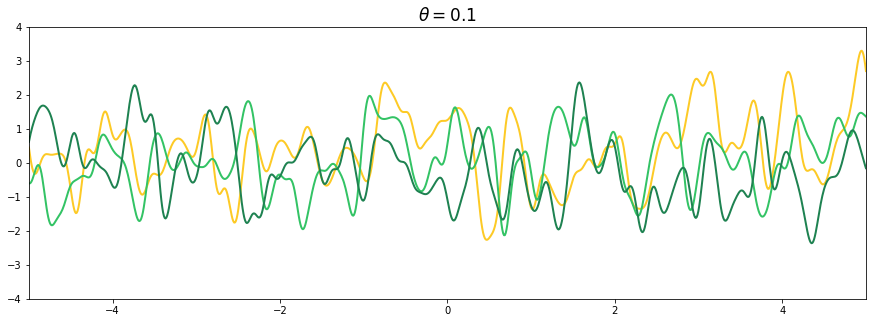

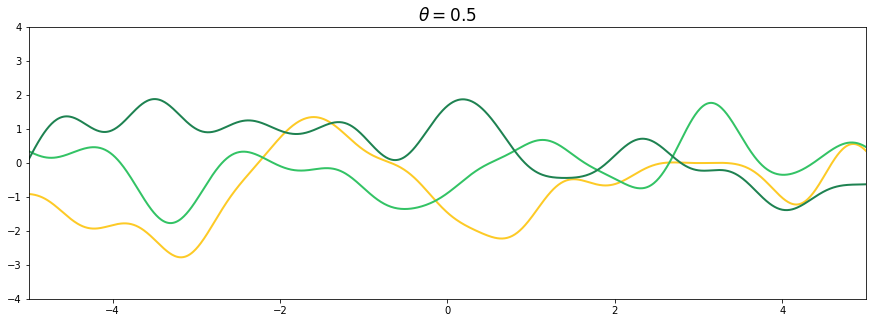

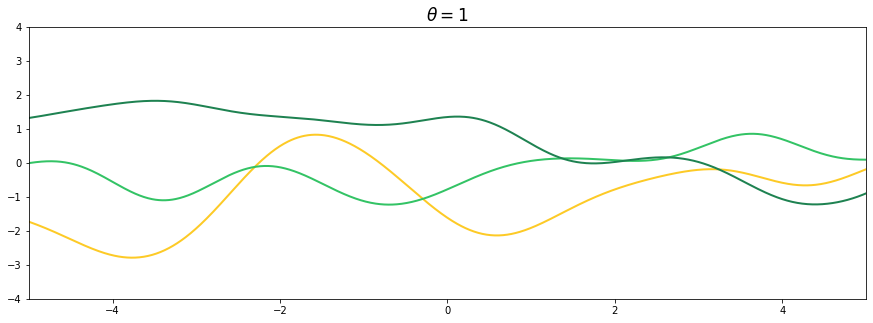

In [3]:
x_range = 5
n_samples = 3
#colors = ['#fdca26', '#33C365', '#7B7C7C']
colors = ['#fdca26', '#33C365', '#1E8251']

for theta in [0.1, 0.5, 1]:
    kernel = RBF(length_scale = theta)    
    gp = GaussianProcessRegressor(kernel = kernel, random_state = 268855)

    x = np.linspace(-x_range, x_range, 1000)

    y_samples = gp.sample_y(x.reshape(-1, 1), n_samples)
    
    for i, c in zip(range(n_samples), colors):
        plt.plot(x, y_samples[:, i], c, lw = 2)

    plt.xlim(-x_range, x_range)
    plt.ylim(-4, 4)
    plt.title(fr'$\theta = {theta}$', fontsize = 17)
    
    theta = str(theta).replace('.', '_')
    plt.savefig(f'gp_theta_{theta}.png', bbox_inches = 'tight')
    plt.show()